<a href="https://colab.research.google.com/github/hawaesanda/PCVK_2024/blob/main/Jobsheet5_Hawa-Esanda_2241720079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 5**

Operasi Aritmatika dan Logika - Gamma Correction,
Image Depth, PSNR, Average Denoising, Image Masking

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Buat Gamma Correction**

Gamma Correction on Image
----------------------------------
Masukkan nilai Gamma: 3


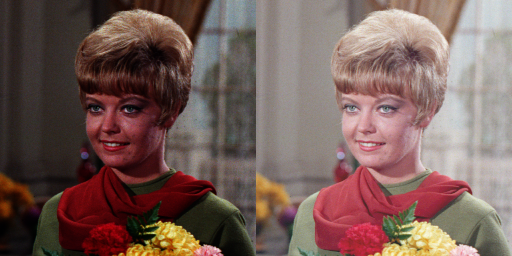

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print('Gamma Correction on Image')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0  # Default to neutral if invalid input

# Load image
img = cv.imread("/content/drive/MyDrive/Images/female.tiff")

# Gamma correction dengan menggunakan inverse gamma
invGamma = 1.0 / gamma
img_gamma = np.power(img / 255.0, invGamma) * 255.0

# Convert ke uint8
img_gamma = np.uint8(img_gamma)

# Gabungan gambar asli dan gambar setelah dikoreksi gamma
img_result = cv.hconcat([img, img_gamma])

# Result
cv2_imshow(img_result)


### **Buat Simulasi Image Depth**

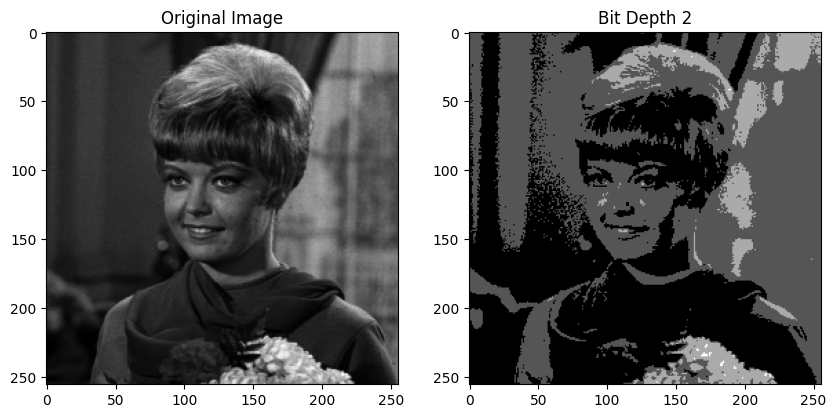

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Nilai kedalaman bit
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)
original = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# Menghitung nilai piksel baru berdasarkan kedalaman bit
depth_image = np.round(original / level) * level
depth_image = np.uint8(depth_image)

# Menampilkan gambar asli dan hasil reduksi kedalaman bit
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title(f'Bit Depth {bit_depth}')

plt.show()

### **Buat modul Average Denoising**

PSNR Average 5 Image:  27.53913189244123
PSNR Average 10 Image:  27.556443657166447
PSNR Average 20 Image:  27.5188002701703
PSNR Average 40 Image:  27.457069133128282
PSNR Average 80 Image:  27.399852250338785
PSNR Average 100 Image:  27.370931279516654


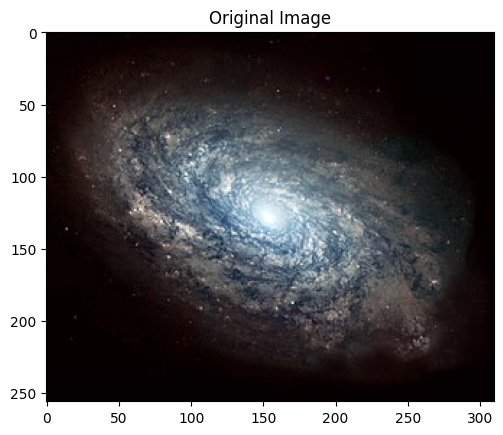

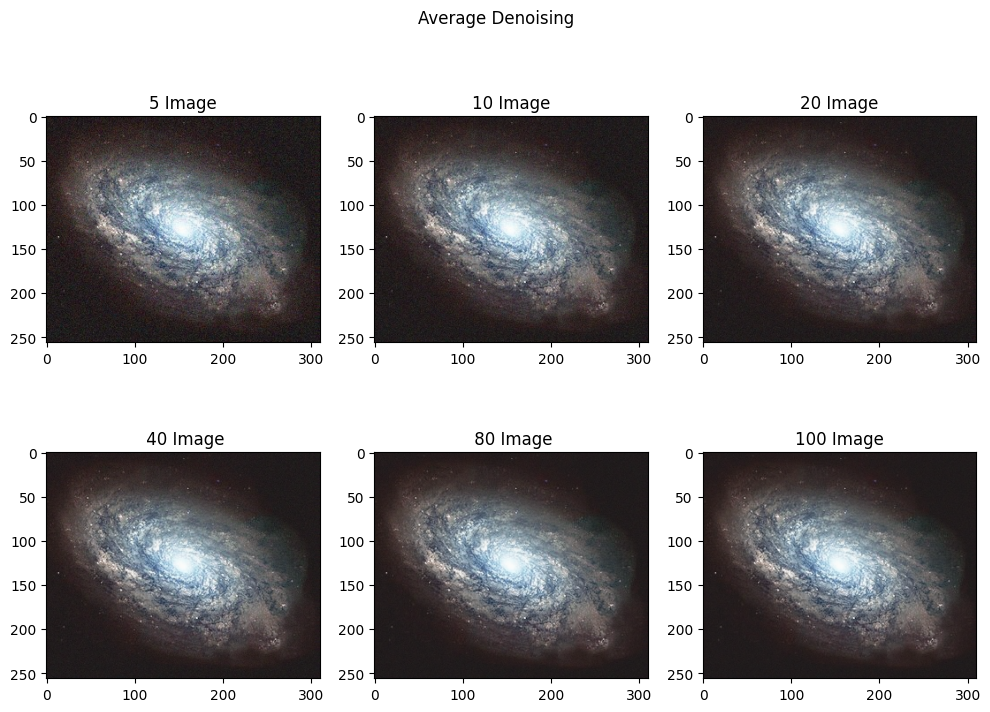

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load all images from the specified directory
original = cv2.imread('/content/drive/MyDrive/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:
        cv_img.append(n)

def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # MSE 0 means no noise, so PSNR is not defined
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def average_denoising(images, jumlah_citra):
    sum_image = np.zeros(images[0].shape, np.float64)
    for i in range(jumlah_citra):
        sum_image = sum_image + images[i]
    average_image = sum_image / jumlah_citra
    return np.clip(average_image, 0, 255).astype(np.uint8)

plt.title('Original Image')
plt.imshow(original)

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Average Denoising')

avg05 = average_denoising(cv_img, 5)
ax[0, 0].imshow(avg05)
ax[0, 0].set_title('5 Image')

avg10 = average_denoising(cv_img, 10)
ax[0, 1].imshow(avg10)
ax[0, 1].set_title('10 Image')

avg20 = average_denoising(cv_img, 20)
ax[0, 2].imshow(avg20)
ax[0, 2].set_title('20 Image')

avg40 = average_denoising(cv_img, 40)
ax[1, 0].imshow(avg40)
ax[1, 0].set_title(' 40 Image')

avg80 = average_denoising(cv_img, 80)
ax[1, 1].imshow(avg80)
ax[1, 1].set_title(' 80 Image')

avg100 = average_denoising(cv_img, 100)
ax[1, 2].imshow(avg100)
ax[1, 2].set_title('100 Image')

psnr05 = PSNR(original, avg05)
psnr10 = PSNR(original, avg10)
psnr20 = PSNR(original, avg20)
psnr40 = PSNR(original, avg40)
psnr80 = PSNR(original, avg80)
psnr100 = PSNR(original, avg100)
print('PSNR Average 5 Image: ', psnr05)
print('PSNR Average 10 Image: ', psnr10)
print('PSNR Average 20 Image: ', psnr20)
print('PSNR Average 40 Image: ', psnr40)
print('PSNR Average 80 Image: ', psnr80)
print('PSNR Average 100 Image: ', psnr100)

### **Image Masking**

AND

Text(0.5, 1.0, 'Citra Masking')

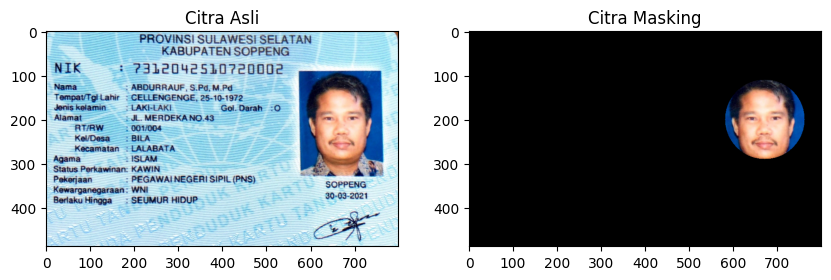

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
ktp = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/KTP7.jpeg')
ktp = cv.cvtColor(ktp, cv.COLOR_BGR2RGB)

mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 200, -1)
masked_image_face = cv.bitwise_and(ktp, ktp, mask=mask)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_face)
ax[1].set_title('Citra Masking')


OR (atau)

Text(0.5, 1.0, 'Citra Masking')

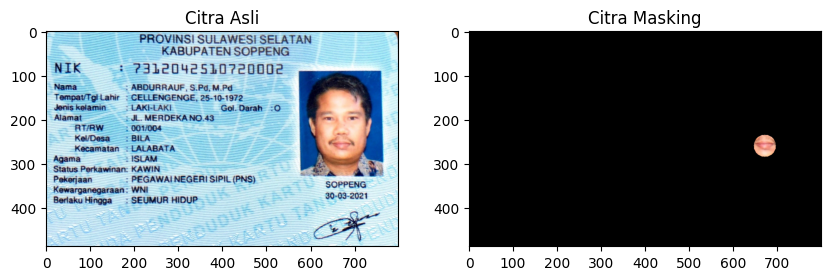

In [ ]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 260), 25, 200, -1)
masked_image_mouth = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_mouth)
ax[1].set_title('Citra Masking')


Text(0.5, 1.0, 'Citra Masking')

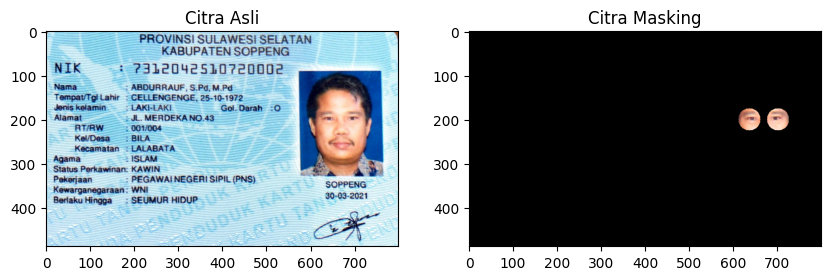

In [ ]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (635, 200), 25, 200, -1)
cv.circle(mask, (700, 200), 25, 200, -1)
masked_image_eye = cv.bitwise_and(ktp, ktp, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(masked_image_eye)
ax[1].set_title('Citra Masking')


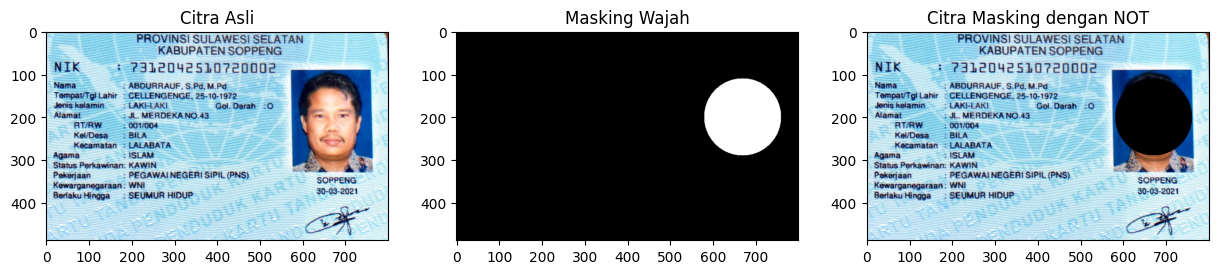

In [ ]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)

mask_not = cv.bitwise_not(mask)
masked_image_not_face = cv.bitwise_and(ktp, ktp, mask=mask_not)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image_not_face)
ax[2].set_title('Citra Masking dengan NOT')

plt.show()

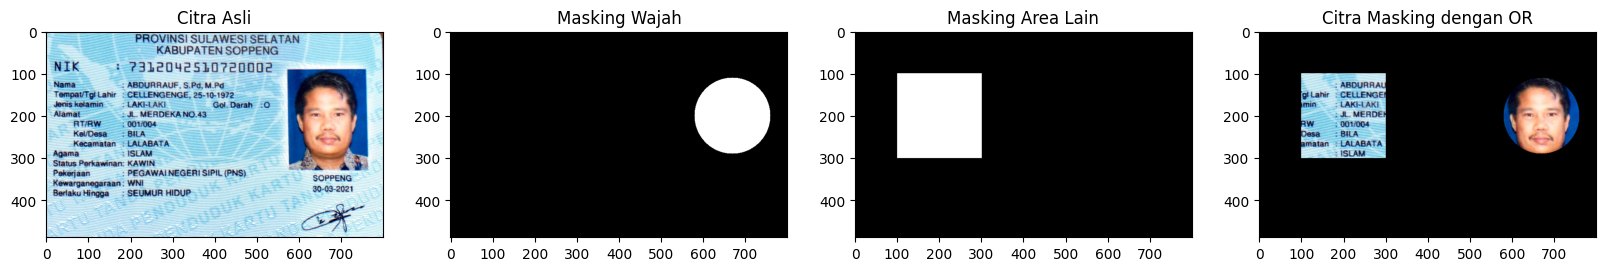

In [ ]:
# Membuat mask lingkaran untuk wajah
mask_face = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask_face, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Membuat mask persegi panjang di bagian lain gambar
mask_rectangle = np.zeros(ktp.shape[:2], dtype="uint8")
cv.rectangle(mask_rectangle, (100, 100), (300, 300), 255, -1)  # Masking area lain (sesuaikan)

# Menggabungkan dua mask menggunakan operator OR
mask_combined = cv.bitwise_or(mask_face, mask_rectangle)

# Menerapkan mask gabungan ke gambar asli
masked_image = cv.bitwise_and(ktp, ktp, mask=mask_combined)

# Menampilkan hasil
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask_face, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(mask_rectangle, cmap='gray')
ax[2].set_title('Masking Area Lain')

ax[3].imshow(masked_image)
ax[3].set_title('Citra Masking dengan OR')

plt.show()

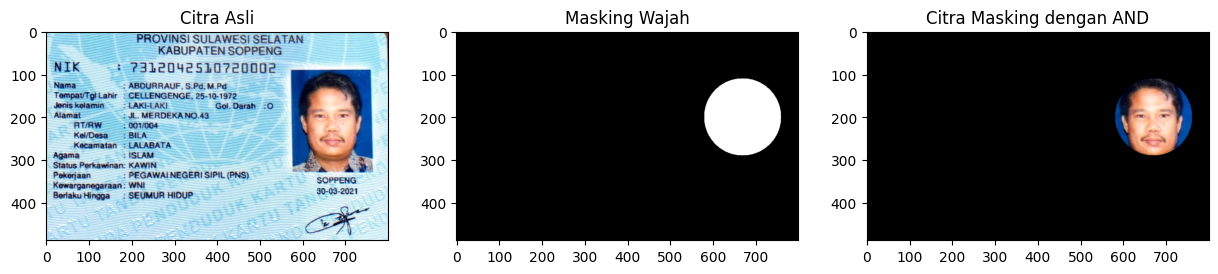

In [ ]:
# Membuat mask lingkaran untuk wajah
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Menerapkan mask pada gambar menggunakan operator AND
masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(masked_image)
ax[2].set_title('Citra Masking dengan AND')

plt.show()

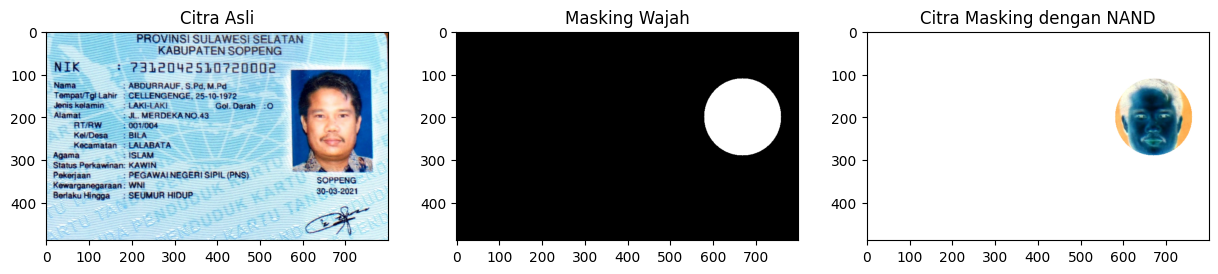

In [ ]:
# Membuat mask lingkaran untuk wajah
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Menerapkan AND pada gambar (masking wajah)
masked_image = cv.bitwise_and(ktp, ktp, mask=mask)

# Membalik hasil AND dengan operator NOT (NAND)
nand_masked_image = cv.bitwise_not(masked_image)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(nand_masked_image)
ax[2].set_title('Citra Masking dengan NAND')

plt.show()

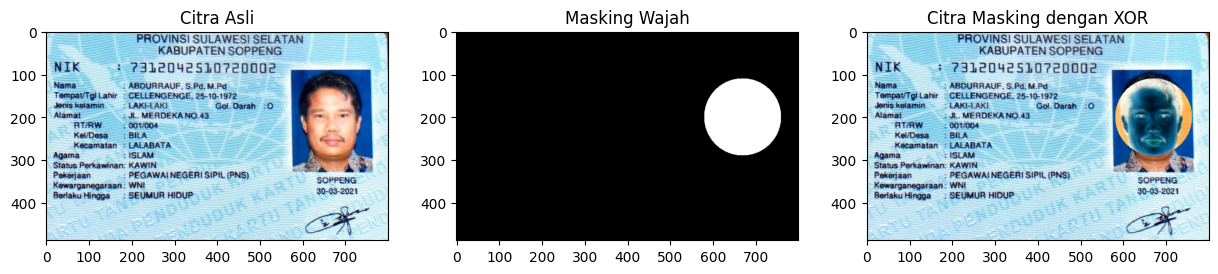

In [ ]:
mask = np.zeros(ktp.shape[:2], dtype="uint8")
cv.circle(mask, (670, 200), 90, 255, -1)  # Masking wajah (sesuaikan posisi dan ukuran lingkaran)

# Mengubah mask menjadi tiga channel
mask_colored = cv.merge([mask, mask, mask])  # Mengulang mask ke tiga channel

# Melakukan operasi XOR antara gambar dan mask
xor_masked_image = cv.bitwise_xor(ktp, mask_colored)

# Menampilkan hasil
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(ktp)
ax[0].set_title('Citra Asli')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title('Masking Wajah')

ax[2].imshow(xor_masked_image)
ax[2].set_title('Citra Masking dengan XOR')

plt.show()